<a href="https://colab.research.google.com/github/Akshayaa18S/GRADIENT-DESCENT/blob/main/Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results:
1️⃣ Initial Loss Function Computed ✅
2️⃣ Best m (Linear Search)   : 2.7879, Loss: 0.9826, Time: 0.003416 sec
3️⃣ Best m (Gradient Descent): 2.7951, Loss: 0.9809, Time: 0.027801 sec


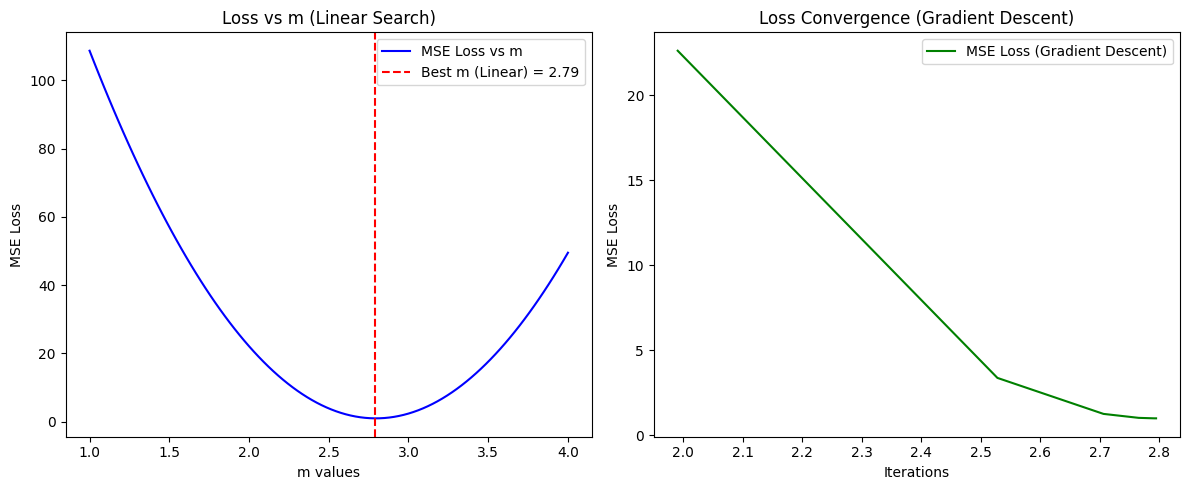

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
np.random.seed(40)

# Generate data
x = np.linspace(0, 10, 200)
m_actual, b_actual = 2.8, 5.2
noise = np.random.normal(0, 1, size=len(x))

y = m_actual * x + b_actual + noise

# Function to calculate Mean Squared Error (MSE)
def mse_loss(m_pred, b_pred, x, y):
    """
    Computes the Mean Squared Error (MSE) between predicted and actual values.

    Parameters:
    m_pred (float): Predicted slope
    b_pred (float): Intercept
    x (numpy array): Input data
    y (numpy array): Target values

    Returns:
    float: Mean Squared Error
    """
    y_pred = m_pred * x + b_pred
    return np.mean((y - y_pred) ** 2)

# Perform linear search over a range of slope values
m_values = np.linspace(1, 4, 100)
loss_vals = [mse_loss(m, b_actual, x, y) for m in m_values]

# Find best slope using linear search
start_time_linear = time.time()
best_m_linear = m_values[np.argmin(loss_vals)]
min_loss_linear = min(loss_vals)
time_linear = time.time() - start_time_linear

# Gradient Descent implementation
def gradient_descent(x, y, iterations=300, lr=0.01):
    """
    Performs gradient descent to optimize the slope (m) of a linear model.

    Parameters:
    x (numpy array): Input data
    y (numpy array): Target values
    iterations (int): Number of iterations (default: 300)
    lr (float): Learning rate (default: 0.01)

    Returns:
    float: Optimized slope (m)
    list: Loss history
    list: Slope values over iterations
    """
    m = np.random.rand()
    loss_hist = []
    m_hist = []

    for _ in range(iterations):
        grad = -2 * np.mean(x * (y - (m * x + b_actual)))  # Compute gradient
        m -= lr * grad  # Update slope using gradient descent
        m_hist.append(m)
        loss_hist.append(mse_loss(m, b_actual, x, y))

    return m, loss_hist, m_hist

# Perform gradient descent
start_time_gd = time.time()
best_m_gd, loss_hist_gd, m_hist_gd = gradient_descent(x, y)
time_gd = time.time() - start_time_gd

# Print results
print("Results:")
print(f"1️⃣ Initial Loss Function Computed ✅")
print(f"2️⃣ Best m (Linear Search)   : {best_m_linear:.4f}, Loss: {min_loss_linear:.4f}, Time: {time_linear:.6f} sec")
print(f"3️⃣ Best m (Gradient Descent): {best_m_gd:.4f}, Loss: {loss_hist_gd[-1]:.4f}, Time: {time_gd:.6f} sec")

# Plot results
plt.figure(figsize=(12, 5))

# Plot MSE loss vs. slope for linear search
plt.subplot(1, 2, 1)
plt.plot(m_values, loss_vals, label="MSE Loss vs m", color="blue")
plt.axvline(best_m_linear, linestyle="--", color="red", label=f"Best m (Linear) = {best_m_linear:.2f}")
plt.xlabel("m values")
plt.ylabel("MSE Loss")
plt.title("Loss vs m (Linear Search)")
plt.legend()

# Plot loss convergence for gradient descent
plt.subplot(1, 2, 2)
plt.plot(m_hist_gd, loss_hist_gd, label="MSE Loss (Gradient Descent)", color="green")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Convergence (Gradient Descent)")
plt.legend()

plt.tight_layout()
plt.show()
